## **Resumo**
### **Descrição do DataSet**

*    **Nome:** *Estimation of obesity levels based on eating habits and physical condition Data Set* 
(Estimativa dos níveis de obesidade com base em hábitos alimentares e físicos, em português)
*    **Tamanho:** (2111, 17)
*   **Features:** 
    *   **Features Numéricas:** 8
    *   **Features Categóricas:** 8 (Fuma, Meio de Transporte, Consumo de Álcool, etc)

### **Algoritmos Utilizados**
*   **SVC**
*   **Random Forest**
*   **KNeighborsClassifier**
*   **DecisionTreeClassifier**
*   **GradientBoostingClassifier**
*   **Perceptron**
*   **MLPClassifier** 

### **Procedimentos**
*   **Aplicação dos algoritmos sem uso do GridSearch**
*   **Aplicação dos algoritmos usando o GridSearch**
*   **Usando a biblioteca PipelineHelper**


**Realizando Importações**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
import warnings

warnings.filterwarnings('ignore')

# Analisando o *Dataset*

**Carregando o DataSet**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AprendizadoDeMaquina/datasets/obesidade.csv')

print(df.shape)

(2111, 17)


In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


**Features Numéricas**

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Features Categóricas**

In [ ]:
df.describe(include=['object'])

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


**Verificando dados nulos**

In [ ]:
np.sum(df.isnull()==True)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### **Quantidade de cada classe**

In [ ]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

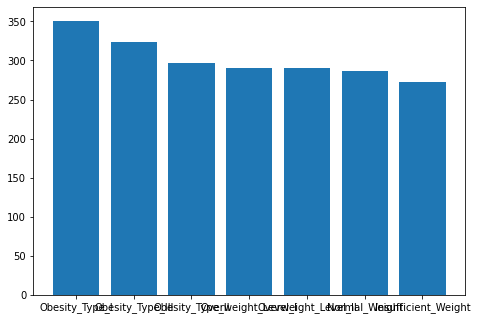

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,0,1,1])
langs = df['NObeyesdad'].value_counts().index.tolist()
values = list(df['NObeyesdad'].value_counts().to_numpy())
plt.rcParams["figure.figsize"] = (20,3)
ax.bar(langs,values)
plt.show();

**Tratando Dados Categóricos**

In [ ]:
map_replace = {
    'NObeyesdad': {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6},
    'family_history_with_overweight': {'yes': 1, 'no': 0},
    'FAVC': {'yes': 1, 'no': 0},
    'SMOKE': {'yes': 1, 'no': 0},
    'SCC': {'yes': 0, 'no': 1},
    'CAEC': {'Always': 3, 'Frequently': 2, 'Sometimes': 1, 'no': 0},
    'CALC': {'Always': 3, 'Frequently': 2, 'Sometimes': 1, 'no': 0},
    'MTRANS': {'Automobile': 4, 'Motorbike': 3, 'Public_Transportation': 2, 'Walking': 1, 'Bike': 0},
    'Gender': {'Female': 1, 'Male': 0}
}
df_convertido = df.replace(map_replace)
df_convertido

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,1,0.000000,1.000000,0,2,1
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,0,3.000000,0.000000,1,2,1
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,1,2.000000,1.000000,2,2,1
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,1,2.000000,0.000000,2,1,5
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,1,0.000000,0.000000,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,1,1.676269,0.906247,1,2,4
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,1,1.341390,0.599270,1,2,4
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,1,1.414209,0.646288,1,2,4
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,1,1.139107,0.586035,1,2,4


**Separando Targets e Features**

In [ ]:
X = df_convertido.drop(columns=['NObeyesdad']).to_numpy()
y = df_convertido['NObeyesdad'].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43, stratify=y)

# Sem uso do GridSearch

In [ ]:
algorithms = [
                SVC(random_state=5),                        # 0
                RandomForestClassifier(random_state=5),     # 1
                KNeighborsClassifier(),                     # 2
                DecisionTreeClassifier(random_state=5),     # 3
                GradientBoostingClassifier(random_state=5), # 4
                Perceptron(random_state=5),                 # 5
                MLPClassifier(random_state=42),             # 6
              ]

algorithms_name = { 
                    0: 'SVC',                         # 0
                    1: 'Random Forest',               # 1
                    2: 'KNeighborsClassifier',        # 2
                    3: 'DecisionTreeClassifier',      # 3
                    4: 'GradientBoostingClassifier',  # 4
                    5: 'Perceptron',                  # 5
                    6: 'MLP',                         # 6     
                  }               

escalonamento = [
                 preprocessing.StandardScaler(), 
                 preprocessing.MinMaxScaler()
                ]

In [ ]:
resultsNewCompTest = []

for idx, alg in enumerate(algorithms):
  if (idx == 0 or idx == 2 or idx == 5 or idx == 6):
      for ide, scal in enumerate(escalonamento):
        pipe = Pipeline([
          ('scale', scal),
          ('clf', alg)
        ])       
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        acuraciaTest = metrics.accuracy_score(y_test, y_pred)
        precisaoTest = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recallTest =  metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1Test = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
        result = { 'model': algorithms_name[idx], 'Scaler': 'StandardScaler' if (ide==0) else 'MinMaxScaler', 'Acuracia': acuraciaTest, 'Precision': precisaoTest, 'Recall': recallTest, 'F1-Score': f1Test}
        resultsNewCompTest.append(result)        
  else:
      pipe = Pipeline([
        ('clf', alg)
      ])

      pipe.fit(X_train, y_train)
      y_pred = pipe.predict(X_test)
      acuraciaTest = metrics.accuracy_score(y_test, y_pred)
      precisaoTest = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
      recallTest =  metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
      f1Test = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
      result = { 'model': algorithms_name[idx], 'Scaler': 'noScaler', 'Acuracia': acuraciaTest, 'Precision': precisaoTest, 'Recall': recallTest, 'F1-Score': f1Test}
      resultsNewCompTest.append(result)

In [ ]:
resul = pd.DataFrame(resultsNewCompTest).sort_values(by='F1-Score', ascending=False)
resul_mlp = resul[resul['model'] == 'MLP']
resul_svc = resul[resul['model'] == 'SVC']
resul_knn = resul[resul['model'] == 'KNeighborsClassifier']
resul_perceptron = resul[resul['model'] == 'Perceptron']
resul_gb = resul[resul['model'] == 'GradientBoostingClassifier']
resul_rf = resul[resul['model'] == 'Random Forest']
resul_dt = resul[resul['model'] == 'DecisionTreeClassifier']

In [ ]:
df_best_alg_sg = []
df_best_alg_sg.append((resul_mlp.iloc[[0]]))
df_best_alg_sg.append((resul_svc.iloc[[0]]))
df_best_alg_sg.append((resul_knn.iloc[[0]]))
df_best_alg_sg.append((resul_perceptron.iloc[[0]]))
df_best_alg_sg.append((resul_gb.iloc[[0]]))
df_best_alg_sg.append((resul_rf.iloc[[0]]))
df_best_alg_sg.append((resul_dt.iloc[[0]]))

df_list_best_sg = pd.concat(df_best_alg_sg)
df_list_best_sg = df_list_best_sg.sort_values(by='F1-Score', ascending=False)
df_list_best_sg

,model,Scaler,Acuracia,Precision,Recall,F1-Score
6,GradientBoostingClassifier,noScaler,0.960227,0.960000,0.960227,0.959840
2,Random Forest,noScaler,0.958333,0.960177,0.958333,0.958695
5,DecisionTreeClassifier,noScaler,0.954545,0.954534,0.954545,0.954427
9,MLP,StandardScaler,0.926136,0.926938,0.926136,0.926226
0,SVC,StandardScaler,0.890152,0.892353,0.890152,0.891053
3,KNeighborsClassifier,StandardScaler,0.820076,0.825261,0.820076,0.811227
7,Perceptron,StandardScaler,0.647727,0.675561,0.647727,0.650746


In [ ]:
best_1 = df_list_best_sg.iloc[[0]]
best_1

,model,Scaler,Acuracia,Precision,Recall,F1-Score
6,GradientBoostingClassifier,noScaler,0.960227,0.96,0.960227,0.95984


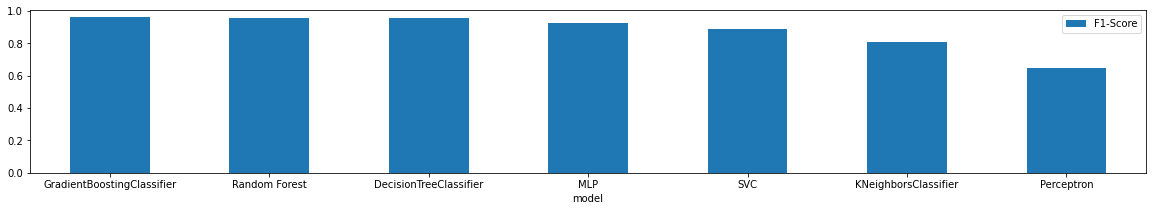

In [ ]:
ax = df_list_best_sg.plot.bar(x='model', y='F1-Score', rot=0)
ax

# GridSerach

In [ ]:
param_grid_svc = [
    {
        'clf__C': np.logspace(-4, 4, 9),
        'clf__kernel': ['rbf', 'sigmoid'],
        'clf__gamma': ['scale', 'auto'],
        'clf__max_iter': [-1, 10, 100, 1000],
    },
]

param_grid_rf = [
    {
        'clf__n_estimators': [15, 30, 50, 70, 150, 250],
        'clf__criterion': ['gini', 'entropy'],
    },
]

param_grid_knn = [
    {
        'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    },
]

param_grid_dt = [
    {
        'clf__criterion': ['gini', 'entropy'],
        'clf__splitter':['best', 'random'],
    },
]

param_grid_gb = [
    {
        'clf__n_estimators' : [30, 40, 50,100, 200, 300], 
        'clf__learning_rate' : [0.001, 0.1, 0.2, 0.4, 0.6, 0.7, 1.0],
        'clf__max_depth':[-1, 1, 2, 3],       
    },
]

param_grid_percp = [
    {
        'clf__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'clf__max_iter': [10, 100, 1000],
        'clf__tol':[1e-1, 1e-2, 1e-3, 1e-4],  
    },
]

param_grid_mlp = [
    {
        'clf__learning_rate': ['constant', 'invscaling', 'adaptive'],
        'clf__max_iter': [10, 100, 1000],
        'clf__tol':[1e-1, 1e-2, 1e-3, 1e-4],  
    },
]

params = [param_grid_svc, param_grid_rf, param_grid_knn, param_grid_dt, param_grid_gb, param_grid_percp, param_grid_mlp]

In [ ]:
resultados_gs = []
escalonamento = [preprocessing.StandardScaler(), preprocessing.MinMaxScaler()]
for idx, alg in enumerate(algorithms):
  if (idx == 0 or idx == 2 or idx == 5 or idx == 6):
      for ide, scal in enumerate(escalonamento):
        pipe = Pipeline([
          ('scale', scal),
          ('clf', alg)
        ])
        grid = GridSearchCV(pipe, param_grid=params[idx], scoring='f1_weighted', cv=5, n_jobs=-1)
        gs_result = grid.fit(X_train, y_train)
        r = {'Algoritmo': algorithms_name[idx], 'Melhor Parametro': grid.best_params_, 'Escalonador': 'StandardScaler' if (ide==0) else 'MinMaxScaler', 'F1-Score': grid.best_score_}
        resultados_gs.append(r)       
  else:
      pipe = Pipeline([
        ('clf', alg)
      ])
      grid = GridSearchCV(pipe, param_grid=params[idx], scoring='f1_weighted', cv=5, n_jobs=-1)
      gs_results = grid.fit(X_train, y_train)
      r = {'Algoritmo': algorithms_name[idx], 'Melhor Parametro': grid.best_params_, 'Escalonador': 'No Scaler', 'F1-Score': grid.best_score_}
      resultados_gs.append(r)  

In [ ]:
appended_data=pd.DataFrame(resultados_gs)
appended_data

,Algoritmo,Melhor Parametro,Escalonador,F1-Score
0,SVC,"{'clf__C': 100.0, 'clf__gamma': 'scale', 'clf_...",StandardScaler,0.910438
1,SVC,"{'clf__C': 1000.0, 'clf__gamma': 'auto', 'clf_...",MinMaxScaler,0.942904
2,Random Forest,"{'clf__criterion': 'entropy', 'clf__n_estimato...",No Scaler,0.950178
3,KNeighborsClassifier,"{'clf__algorithm': 'auto', 'clf__n_neighbors': 1}",StandardScaler,0.808206
4,KNeighborsClassifier,"{'clf__algorithm': 'auto', 'clf__n_neighbors': 1}",MinMaxScaler,0.783439
5,DecisionTreeClassifier,"{'clf__criterion': 'entropy', 'clf__splitter':...",No Scaler,0.939822
6,GradientBoostingClassifier,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",No Scaler,0.960817
7,Perceptron,"{'clf__max_iter': 100, 'clf__penalty': 'l1', '...",StandardScaler,0.647552
8,Perceptron,"{'clf__max_iter': 10, 'clf__penalty': 'l1', 'c...",MinMaxScaler,0.602836
9,MLP,"{'clf__learning_rate': 'constant', 'clf__max_i...",StandardScaler,0.912700


In [ ]:
df_svc = (appended_data[appended_data['Algoritmo']=='SVC']).sort_values(by='F1-Score', ascending=False)
df_rf = (appended_data[appended_data['Algoritmo']=='Random Forest']).sort_values(by='F1-Score', ascending=False)
df_knn = appended_data[appended_data['Algoritmo']=='KNeighborsClassifier'].sort_values(by='F1-Score', ascending=False)
df_dt = appended_data[appended_data['Algoritmo']=='DecisionTreeClassifier'].sort_values(by='F1-Score', ascending=False)
df_gb = appended_data[appended_data['Algoritmo']=='GradientBoostingClassifier'].sort_values(by='F1-Score', ascending=False)
df_perceptron = appended_data[appended_data['Algoritmo']=='Perceptron'].sort_values(by='F1-Score', ascending=False)
df_mp = appended_data[appended_data['Algoritmo']=='MLP'].sort_values(by='F1-Score', ascending=False)

In [ ]:
df_best_alg = []
df_best_alg.append((df_svc.iloc[[0]]))
df_best_alg.append((df_rf.iloc[[0]]))
df_best_alg.append((df_knn.iloc[[0]]))
df_best_alg.append((df_dt.iloc[[0]]))
df_best_alg.append((df_gb.iloc[[0]]))
df_best_alg.append((df_perceptron.iloc[[0]]))
df_best_alg.append((df_mp.iloc[[0]]))

df_list_best = pd.concat(df_best_alg)
df_list_best_grid = df_list_best.sort_values(by='F1-Score', ascending=False)
df_list_best_grid

,Algoritmo,Melhor Parametro,Escalonador,F1-Score
6,GradientBoostingClassifier,"{'clf__learning_rate': 0.1, 'clf__max_depth': ...",No Scaler,0.960817
2,Random Forest,"{'clf__criterion': 'entropy', 'clf__n_estimato...",No Scaler,0.950178
1,SVC,"{'clf__C': 1000.0, 'clf__gamma': 'auto', 'clf_...",MinMaxScaler,0.942904
5,DecisionTreeClassifier,"{'clf__criterion': 'entropy', 'clf__splitter':...",No Scaler,0.939822
10,MLP,"{'clf__learning_rate': 'constant', 'clf__max_i...",MinMaxScaler,0.934910
3,KNeighborsClassifier,"{'clf__algorithm': 'auto', 'clf__n_neighbors': 1}",StandardScaler,0.808206
7,Perceptron,"{'clf__max_iter': 100, 'clf__penalty': 'l1', '...",StandardScaler,0.647552


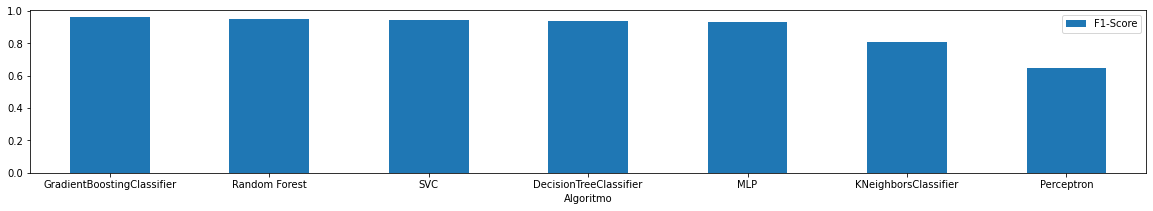

In [ ]:
ax = df_list_best_grid.plot.bar(x='Algoritmo', y='F1-Score', rot=0)
ax

In [ ]:
print(df_list_best_grid['Melhor Parametro'].values[0])

{'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 300}


In [ ]:
clf = GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 300)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

acuracia = metrics.accuracy_score(y_test, y_pred_test)
precision = metrics.precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
recall = metrics.recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
f1_score = metrics.f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
result_f=[]
result_test = { 'Algoritmo': 'GradientBoostingClassifier','Acuracia': acuracia, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
result_f.append(result_test)

In [ ]:
best_2 = pd.DataFrame(result_f)
best_2

,Algoritmo,Acuracia,Precision,Recall,F1-Score
0,GradientBoostingClassifier,0.964015,0.963782,0.964015,0.963658


# Comparação Resultados Sem Gridsearch e Com Gridsearch

In [ ]:
df_list_best_grid

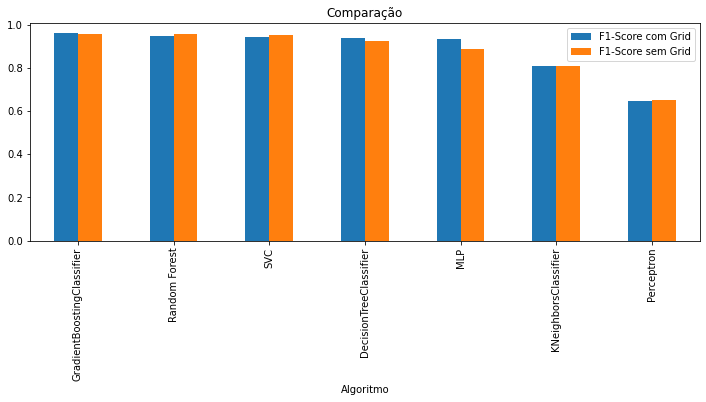

In [ ]:
df_comp = pd.DataFrame(list(zip(df_list_best_grid['Algoritmo'], df_list_best_grid['F1-Score'],df_list_best_sg['F1-Score'])), columns = ['Algoritmo','F1-Score com Grid', 'F1-Score sem Grid'])
df_comp.plot(x="Algoritmo", y=["F1-Score com Grid", "F1-Score sem Grid"], kind="bar", figsize=(12,4), title="Comparação");

# Biblioteca PipelineHelper

In [ ]:
!pip install PipelineHelper

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from pipelinehelper import PipelineHelper
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('minmax', MinMaxScaler()),
    ])),
    ('classifier', PipelineHelper([
        ('svm', SVC(random_state=5)),
        ('rf', RandomForestClassifier(random_state=5)),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier(random_state=5)),
        ('gb', GradientBoostingClassifier(random_state=5)),
        ('pc', Perceptron(random_state=5)),
        ('mlp', MLPClassifier(random_state=42)),
    ])),
])

params = {
    'classifier__selected_model': pipe.named_steps['classifier'].generate({ 

        # SVM
        'svm__C': np.logspace(-4, 4, 9),
        'svm__kernel': ['rbf', 'sigmoid'],
        'svm__gamma': ['scale', 'auto'],
        'svm__max_iter': [-1, 10, 100, 1000],      

        # Random Forest
        'rf__n_estimators': [15, 30, 50, 70, 150, 250],
        'rf__criterion': ['gini', 'entropy'],        

        # kNN  
        'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],          

        # Árvore de Decisão
        'dt__criterion': ['gini', 'entropy'],
        'dt__splitter':['best', 'random'],

        # Gradient Boosting        
        'gb__n_estimators' : [30, 40, 50,100, 200, 300], 
        'gb__learning_rate' : [0.001, 0.1, 0.2, 0.4, 0.6, 0.7, 1.0],
        'gb__max_depth':[-1, 1, 2, 3],         

        # Perceptron
        'pc__penalty' : ['l2', 'l1', 'elasticnet'],
        'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],
        'mlp__max_iter': [10, 100, 1000],
        'mlp__tol':[1e-1, 1e-2, 1e-3, 1e-4],          
    })
}
grid = GridSearchCV(pipe, params, scoring='f1_weighted')

In [ ]:
grid.fit(X_train, y_train);

In [ ]:
print(grid.best_params_)

{'classifier__selected_model': ('gb', {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300})}


In [ ]:
print(grid.best_score_)

0.960817343193227


In [ ]:
clf_b = (grid.best_estimator_).fit(X_train, y_train)

In [ ]:
y_pred_test = clf_b.predict(X_test)

acuracia = metrics.accuracy_score(y_test, y_pred_test)
precision = metrics.precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
recall = metrics.recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
f1_score = metrics.f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
result_f=[]
result_test = { 'Algoritmo': 'GradientBoostingClassifier','Acuracia': acuracia, 'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}
result_f.append(result_test)

In [ ]:
best_3 = pd.DataFrame(result_f)
best_3

,Algoritmo,Acuracia,Precision,Recall,F1-Score
0,GradientBoostingClassifier,0.964015,0.963782,0.964015,0.963658


# Comparação do resultado da predição do conjunto de teste com os 3 métodos

In [ ]:
best_1 = best_1.drop(columns='Scaler')

In [ ]:
frames = [best_1, best_2, best_3]
result = pd.concat(frames)
result['model']='GradientBoostingClassifier'
result.drop(columns='Algoritmo')

,model,Acuracia,Precision,Recall,F1-Score
6,GradientBoostingClassifier,0.960227,0.960000,0.960227,0.959840
0,GradientBoostingClassifier,0.964015,0.963782,0.964015,0.963658
0,GradientBoostingClassifier,0.964015,0.963782,0.964015,0.963658


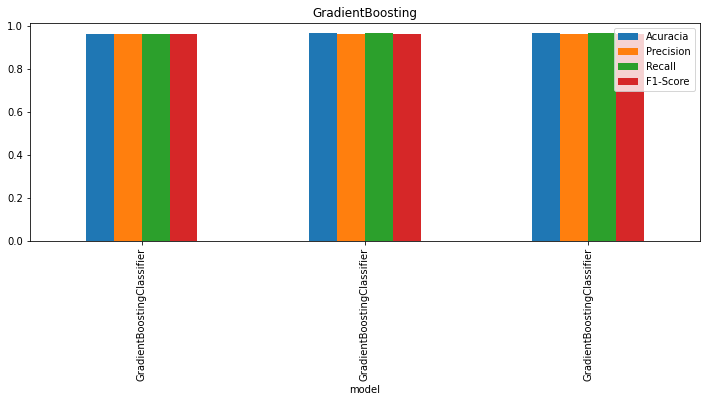

In [ ]:
result.plot(x="model", y=["Acuracia", "Precision", "Recall", "F1-Score"], kind="bar", figsize=(12,4), title="GradientBoosting");